## Lab 2
### Part 2: Dealing with overfitting

Today we work with [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) (*hint: it is available in `torchvision`*).

Your goal for today:
1. Train a FC (fully-connected) network that achieves >= 0.885 test accuracy.
2. Cause considerable overfitting by modifying the network (e.g. increasing the number of network parameters and/or layers) and demonstrate in in the appropriate way (e.g. plot loss and accurasy on train and validation set w.r.t. network complexity).
3. Try to deal with overfitting (at least partially) by using regularization techniques (Dropout/Batchnorm/...) and demonstrate the results.

__Please, write a small report describing your ideas, tries and achieved results in the end of this file.__

*Note*: Tasks 2 and 3 are interrelated, in task 3 your goal is to make the network from task 2 less prone to overfitting. Task 1 is independent from 2 and 3.

*Note 2*: We recomment to use Google Colab or other machine with GPU acceleration.

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchsummary
from torch.utils.data import Subset
from IPython.display import clear_output
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import os
import time

In [2]:
# Technical function
def mkdir(path):
    if not os.path.exists(root_path):
        os.mkdir(root_path)
        print('Directory', path, 'is created!')
    else:
        print('Directory', path, 'already exists!')
        
root_path = 'fmnist'
mkdir(root_path)

Directory fmnist already exists!


In [3]:
download = True
train_transform = transforms.ToTensor()
test_transform = transforms.ToTensor()
transforms.Compose((transforms.ToTensor()))


fmnist_dataset_train = torchvision.datasets.FashionMNIST(root_path, 
                                                        train=True, 
                                                        transform=train_transform,
                                                        target_transform=None,
                                                        download=download)
fmnist_dataset_test = torchvision.datasets.FashionMNIST(root_path, 
                                                       train=False, 
                                                       transform=test_transform,
                                                       target_transform=None,
                                                       download=download)

In [4]:
train_loader = torch.utils.data.DataLoader(fmnist_dataset_train, 
                                           batch_size=128,
                                           shuffle=True,
                                           num_workers=2)
test_loader = torch.utils.data.DataLoader(fmnist_dataset_test,
                                          batch_size=256,
                                          shuffle=False,
                                          num_workers=2)

In [5]:
len(fmnist_dataset_test)

10000

In [6]:
for img, label in train_loader:
    print(img.shape)
#     print(img)
    print(label.shape)
    print(label.size(0))
    break

torch.Size([128, 1, 28, 28])
torch.Size([128])
128


### Task 1
Train a network that achieves $\geq 0.885$ test accuracy. It's fine to use only Linear (`nn.Linear`) layers and activations/dropout/batchnorm. Convolutional layers might be a great use, but we will meet them a bit later.

In [7]:
# TinyNeuralNet: нейронная сеть с 2 скрытыми слоями для классификации изображений
class TinyNeuralNet(nn.Module):
    def __init__(self, input_size=784, num_classes=10):
        super(TinyNeuralNet, self).__init__()
        
        # Первый скрытый слой
        self.flatten = nn.Flatten()            # Слой для преобразования матрицы в вектор
        self.fc1 = nn.Linear(input_size, 300) # Полносвязный слой с 300 выходами
        self.bn1 = nn.BatchNorm1d(300)         # Нормализация
        self.dropout1 = nn.Dropout(0.5)        # Dropout для регуляризации
        self.relu1 = nn.ReLU()                 # Активация ReLU
        
        # Второй скрытый слой
        self.fc2 = nn.Linear(300, 100)         # Полносвязный слой с 100 выходами
        self.dropout2 = nn.Dropout(0.5)        # Dropout для регуляризации
        self.relu2 = nn.ReLU()                 # Активация ReLU
        
        # Выходной слой
        self.fc3 = nn.Linear(100, num_classes) # Выходной слой с числом классов
        self.logsoftmax = nn.LogSoftmax(dim=1) # LogSoftmax для вероятностей

    def forward(self, x):
        # Прямое распространение сигнала
        x = self.flatten(x)                    # Преобразуем входные данные
        x = self.fc1(x)                        # Первый полносвязный слой
        x = self.bn1(x)                        # Нормализация
        x = self.relu1(x)                      # Активация
        x = self.dropout1(x)                   # Dropout
        x = self.fc2(x)                        # Второй полносвязный слой
        x = self.relu2(x)                      # Активация
        x = self.dropout2(x)                   # Dropout
        x = self.fc3(x)                        # Прогноз через выходной слой
        x = self.logsoftmax(x)                 # Преобразование в логарифмическое вероятностное пространство
        return x


In [8]:
# Импорты необходимых библиотек
import torch
import torch.nn as nn
from torchsummary import summary  # Импорт функции summary напрямую

# Определяем устройство: если есть доступная CUDA, используем её, иначе CPU
device = 'cpu'  # Гибкая проверка доступности GPU

# Инициализация и отправка модели на устройство
neural_net = TinyNeuralNet().to(device)  # Используем имя нейросети TinyNeuralNet

# Отображение структуры сети с помощью функции summary
# Указываем input_size в виде кортежа и явно указываем устройство
summary(neural_net, (28*28,), device=device)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 300]         235,500
       BatchNorm1d-3                  [-1, 300]             600
              ReLU-4                  [-1, 300]               0
           Dropout-5                  [-1, 300]               0
            Linear-6                  [-1, 100]          30,100
              ReLU-7                  [-1, 100]               0
           Dropout-8                  [-1, 100]               0
            Linear-9                   [-1, 10]           1,010
       LogSoftmax-10                   [-1, 10]               0
Total params: 267,210
Trainable params: 267,210
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 1.02
Estimated T

Your experiments come here:

In [9]:
# Импорты библиотек
import torch
import torch.nn as nn
import torch.optim as optim  # Импорт оптимизаторов

# Шаг 1: Инициализация нейронной сети
# TinyNeuralNet — это пользовательский класс нейросети
model_instance = TinyNeuralNet()  # Экземпляр модели

# Шаг 2: Инициализация оптимизатора
# В качестве оптимизатора выбран Adam, который часто используется для нейросетей
learning_rate = 1e-3  # Устанавливаем скорость обучения
optimizer = optim.Adam(model_instance.parameters(), lr=learning_rate)  # Подключаем параметры модели

# Шаг 3: Определение функции потерь
# В задачах классификации часто используется CrossEntropyLoss
loss_criterion = nn.CrossEntropyLoss()  # Кросс-энтропия — стандартная функция потерь для многоклассовой классификации

# Вывод информации о созданных объектах
print("Модель инициализирована.")
print(f"Оптимизатор: {optimizer}")
print(f"Функция потерь: {loss_criterion}")


Модель инициализирована.
Оптимизатор: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)
Функция потерь: CrossEntropyLoss()


# Train Function

In [10]:
# Импорты библиотек
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import numpy as np  # Библиотека для вычисления среднего значения

# Инициализация параметров
model_instance = TinyNeuralNet()  # Экземпляр пользовательской модели
learning_rate = 0.001  # Скорость обучения
optimizer = optim.Adam(params=model_instance.parameters(), lr=learning_rate)  # Оптимизатор Adam
loss_function = nn.CrossEntropyLoss()  # Функция ошибки кросс-энтропии

# Для логирования потерь и точности на обучающей и тестовой выборках
train_losses, test_losses = [], []
train_accuracies, test_accuracies = [], []

# Количество эпох
num_epochs = 20

# Основной цикл обучения
for epoch in range(1, num_epochs + 1):  # Начинаем с 1 для удобного логирования
    train_loss_per_epoch = []
    test_loss_per_epoch = []
    train_accuracy_per_epoch = []
    test_accuracy_per_epoch = []

    # Режим тренировки
    model_instance.train()  # Переводим модель в режим обучения
    for batch_idx, (inputs, targets) in enumerate(train_loader):
        # Перемещение тензоров на устройство (CPU или GPU)
        inputs, targets = inputs.to(device), targets.to(device)
        
        optimizer.zero_grad()  # Обнуляем градиенты
        outputs = model_instance(inputs)  # Прямое распространение (forward pass)
        loss = loss_function(outputs, targets)  # Подсчёт функции потерь
        loss.backward()  # Обратное распространение (backpropagation)
        optimizer.step()  # Обновление весов модели

        predictions = outputs.argmax(dim=1)  # Индекс с максимальной вероятностью
        correct_predictions = (predictions == targets).sum().item()  # Количество верных прогнозов
        accuracy = 100 * correct_predictions / len(targets)  # Процент правильных ответов

        train_loss_per_epoch.append(loss.item())
        train_accuracy_per_epoch.append(accuracy)

    # Режим валидации
    model_instance.eval()  # Переводим модель в режим валидации
    with torch.no_grad():
        correct_predictions = 0
        total_samples = 0
        for batch_idx, (test_inputs, test_targets) in enumerate(test_loader):
            test_inputs, test_targets = test_inputs.to(device), test_targets.to(device)
            outputs = model_instance(test_inputs)
            loss = loss_function(outputs, test_targets)
            predictions = outputs.argmax(dim=1)
            total_samples += test_targets.size(0)
            correct_predictions += (predictions == test_targets).sum().item()
            test_loss_per_epoch.append(loss.item())

        test_accuracy = 100 * correct_predictions / total_samples  # Процент точных предсказаний

    train_losses.append(np.mean(train_loss_per_epoch))
    test_losses.append(np.mean(test_loss_per_epoch))
    train_accuracies.append(np.mean(train_accuracy_per_epoch))
    test_accuracies.append(test_accuracy)

    print(f"Эпоха [{epoch}/{num_epochs}] — Потеря на тесте: {test_losses[-1]:.4f} — Точность на тесте: {test_accuracy:.2f}%")



Эпоха [1/20] — Потеря на тесте: 0.4392 — Точность на тесте: 83.64%
Эпоха [2/20] — Потеря на тесте: 0.3947 — Точность на тесте: 85.21%
Эпоха [3/20] — Потеря на тесте: 0.3790 — Точность на тесте: 85.64%
Эпоха [4/20] — Потеря на тесте: 0.3693 — Точность на тесте: 86.04%
Эпоха [5/20] — Потеря на тесте: 0.3574 — Точность на тесте: 86.71%
Эпоха [6/20] — Потеря на тесте: 0.3511 — Точность на тесте: 87.18%
Эпоха [7/20] — Потеря на тесте: 0.3461 — Точность на тесте: 87.31%
Эпоха [8/20] — Потеря на тесте: 0.3422 — Точность на тесте: 87.50%
Эпоха [9/20] — Потеря на тесте: 0.3295 — Точность на тесте: 87.98%
Эпоха [10/20] — Потеря на тесте: 0.3343 — Точность на тесте: 87.63%
Эпоха [11/20] — Потеря на тесте: 0.3276 — Точность на тесте: 87.53%
Эпоха [12/20] — Потеря на тесте: 0.3220 — Точность на тесте: 88.18%
Эпоха [13/20] — Потеря на тесте: 0.3175 — Точность на тесте: 88.35%
Эпоха [14/20] — Потеря на тесте: 0.3230 — Точность на тесте: 88.17%
Эпоха [15/20] — Потеря на тесте: 0.3247 — Точность на тес

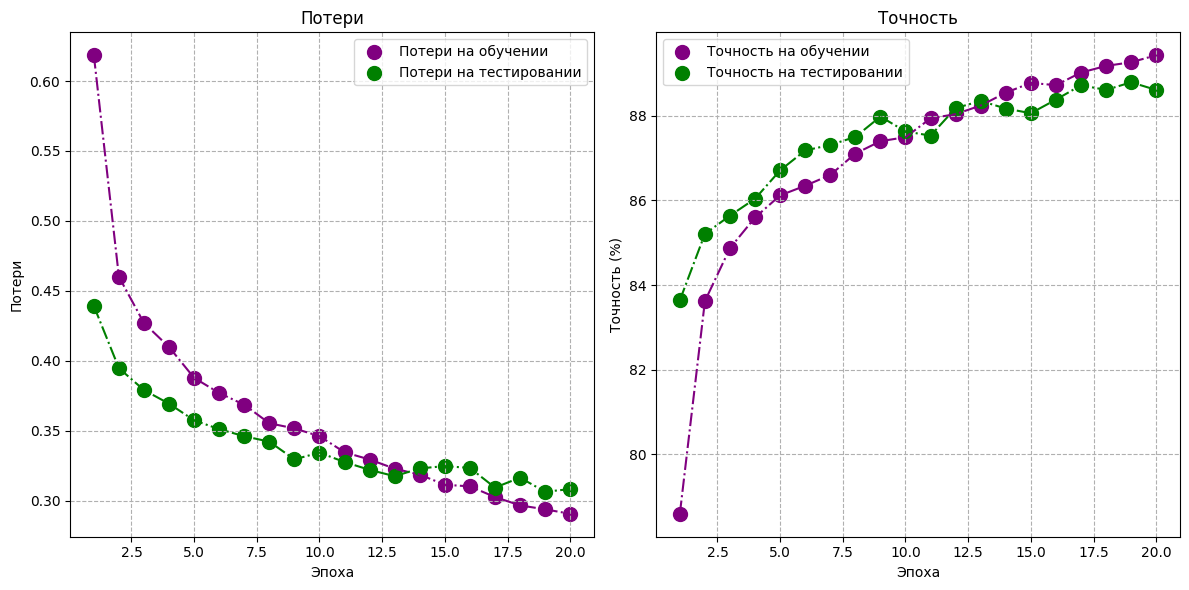

In [12]:
import matplotlib.pyplot as plt

def visualize_training_process_v2(train_losses, test_losses, train_accuracies, test_accuracies):
    
    epochs = range(1, len(train_losses) + 1)
    
    plt.figure(figsize=(12, 6))
    
    # График потерь (loss)
    plt.subplot(1, 2, 1)
    plt.scatter(epochs, train_losses, label='Потери на обучении', color='purple', s=100)
    plt.scatter(epochs, test_losses, label='Потери на тестировании', color='green', s=100)
    plt.plot(epochs, train_losses, color='purple', linestyle='-.')
    plt.plot(epochs, test_losses, color='green', linestyle='-.')
    plt.xlabel('Эпоха')
    plt.ylabel('Потери')
    plt.title('Потери')
    plt.legend()
    plt.grid(True, linestyle='--')
    
    # График точности (accuracy)
    plt.subplot(1, 2, 2)
    plt.scatter(epochs, train_accuracies, label='Точность на обучении', color='purple', s=100)
    plt.scatter(epochs, test_accuracies, label='Точность на тестировании', color='green', s=100)
    plt.plot(epochs, train_accuracies, color='purple', linestyle='-.')
    plt.plot(epochs, test_accuracies, color='green', linestyle='-.')
    plt.xlabel('Эпоха')
    plt.ylabel('Точность (%)')
    plt.title('Точность')
    plt.legend()
    plt.grid(True, linestyle='--')
    
    plt.tight_layout()
    plt.show()
    # Вызов функции для визуализации второй версии
visualize_training_process_v2(train_losses, test_losses, train_accuracies, test_accuracies)



### Task 2: Overfit it.
Build a network that will overfit to this dataset. Demonstrate the overfitting in the appropriate way (e.g. plot loss and accurasy on train and test set w.r.t. network complexity).

*Note:* you also might decrease the size of `train` dataset to enforce the overfitting and speed up the computations.

In [17]:
import torch.nn as nn

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

class OverfittingNeuralNetwork(nn.Module):
    def __init__(self, input_shape=28*28, num_classes=10):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),  # Converts image into a vector
            nn.Linear(784, 392),  # Hidden layer
            nn.ReLU(),  # Activation function
            nn.Linear(392, 10),  # Output layer
            nn.LogSoftmax(dim=1)  # Log softmax for probabilities
        )
        
    def forward(self, inp):
        out = self.model(inp)
        return out

torchsummary.summary(OverfittingNeuralNetwork().to(device), (28*28,))

In [19]:
model = OverfittingNeuralNetwork().to(device)
opt = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_func = nn.CrossEntropyLoss()

In [24]:
def train_model(model, train_loader, val_loader, loss_fn, opt, n_epochs: int):
    train_loss = []
    val_loss = []
    val_accuracy = []
    
    for epoch in range(n_epochs):
        ep_train_loss = []
        ep_val_loss = []
        ep_val_accuracy = []
        start_time = time.time()

        model.train(True)  # Set model to training mode
        for X_batch, y_batch in train_loader:
            # Move data to the same device as the model
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            opt.zero_grad()
            predictions = model(X_batch)
            loss = loss_fn(predictions, y_batch)
            loss.backward()
            opt.step()

            ep_train_loss.append(loss.item())

        model.train(False)  # Set model to evaluation mode
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                # Move data to the same device
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)

                predictions = model(X_batch)
                loss = loss_fn(predictions, y_batch)

                ep_val_loss.append(loss.item())
                y_pred = predictions.max(1)[1].data
                ep_val_accuracy.append((y_pred == y_batch).float().mean().item())

        train_loss.append(np.mean(ep_train_loss))
        val_loss.append(np.mean(ep_val_loss))
        val_accuracy.append(np.mean(ep_val_accuracy))

        print(f"Epoch {epoch+1}/{n_epochs}, Train Loss: {train_loss[-1]:.4f}, Val Loss: {val_loss[-1]:.4f}, Val Accuracy: {val_accuracy[-1]:.4f}, Time: {time.time() - start_time:.2f}s")

    return train_loss, val_loss, val_accuracy


## уменьшим кол-во данных

In [25]:
def subset_ind(dataset, ratio: float):
    return np.random.choice(len(dataset), size=int(ratio*len(dataset)), replace=False)

val_size = 0.1
val_inds = subset_ind(fmnist_dataset_train, val_size)

train_dataset = Subset(fmnist_dataset_train, val_inds)

len(train_dataset)

6000

In [26]:
train_loader = torch.utils.data.DataLoader(train_dataset, 
                                           batch_size=128,
                                           shuffle=True,
                                           num_workers=2)

In [27]:
# Train the model
n_epochs = 75
train_loss, val_loss, val_accuracy = train_model(model, train_loader, test_loader, loss_func, opt, n_epochs)

Epoch 1/75, Train Loss: 0.9955, Val Loss: 0.6685, Val Accuracy: 0.7590, Time: 5.90s
Epoch 2/75, Train Loss: 0.5929, Val Loss: 0.5983, Val Accuracy: 0.7893, Time: 5.88s
Epoch 3/75, Train Loss: 0.5125, Val Loss: 0.5370, Val Accuracy: 0.8128, Time: 6.19s
Epoch 4/75, Train Loss: 0.4734, Val Loss: 0.4997, Val Accuracy: 0.8265, Time: 6.25s
Epoch 5/75, Train Loss: 0.4278, Val Loss: 0.5013, Val Accuracy: 0.8274, Time: 6.25s
Epoch 6/75, Train Loss: 0.4017, Val Loss: 0.4818, Val Accuracy: 0.8305, Time: 6.04s
Epoch 7/75, Train Loss: 0.3816, Val Loss: 0.5022, Val Accuracy: 0.8281, Time: 6.00s
Epoch 8/75, Train Loss: 0.3695, Val Loss: 0.4894, Val Accuracy: 0.8276, Time: 5.89s
Epoch 9/75, Train Loss: 0.3477, Val Loss: 0.4714, Val Accuracy: 0.8370, Time: 5.94s
Epoch 10/75, Train Loss: 0.3338, Val Loss: 0.4694, Val Accuracy: 0.8416, Time: 6.24s
Epoch 11/75, Train Loss: 0.3196, Val Loss: 0.4903, Val Accuracy: 0.8327, Time: 6.45s
Epoch 12/75, Train Loss: 0.3166, Val Loss: 0.4577, Val Accuracy: 0.8420, T

In [28]:
def plot_train_process(train_loss, val_loss, val_accuracy):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    axes[0].set_title('Loss')
    axes[0].plot(train_loss, label='train')
    axes[0].plot(val_loss, label='validation')
    axes[0].legend()

    axes[1].set_title('Validation accuracy')
    axes[1].plot(val_accuracy)
    

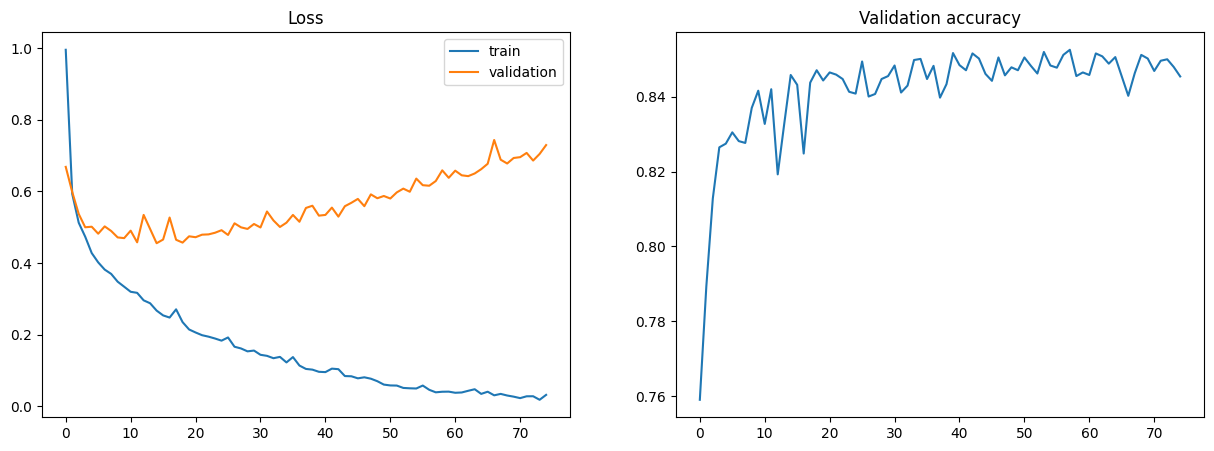

In [29]:
plot_train_process(train_loss, val_loss, val_accuracy)

## как мы можем заметить есть разница в функциях потерь

### Task 3: Fix it.
Fix the overfitted network from the previous step (at least partially) by using regularization techniques (Dropout/Batchnorm/...) and demonstrate the results. 

In [30]:
import torch.nn as nn

class FixedNeuralNetwork(nn.Module):
    def __init__(self, input_shape=28*28, num_classes=10):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),  # Converts image into a vector
            nn.Dropout(p=0.5),  # Dropout layer to reduce overfitting
            nn.Linear(784, 392),  # Fully connected layer
            nn.ReLU(),  # Activation function
            nn.Dropout(p=0.5),  # Dropout layer
            nn.Linear(392, num_classes),  # Output layer
            nn.LogSoftmax(dim=1)  # LogSoftmax for probabilities
        )
        
    def forward(self, inp):
        out = self.model(inp)
        return out
    
torchsummary.summary(FixedNeuralNetwork().to(device), (28*28,))

In [32]:
model = FixedNeuralNetwork().to(device)
opt = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_func = nn.CrossEntropyLoss()

In [33]:
model = FixedNeuralNetwork().to(device)
opt = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_func = nn.CrossEntropyLoss()
n_epochs = 75

train_loss, val_loss, val_accuracy = train_model(model, train_loader, test_loader, loss_func, opt, n_epochs)

plot_train_process(train_loss, val_loss, val_accuracy)

Epoch 1/75, Train Loss: 1.2001, Val Loss: 0.7651, Val Accuracy: 0.7271, Time: 5.92s
Epoch 2/75, Train Loss: 0.7599, Val Loss: 0.6451, Val Accuracy: 0.7671, Time: 6.60s
Epoch 3/75, Train Loss: 0.6826, Val Loss: 0.6015, Val Accuracy: 0.7737, Time: 6.05s
Epoch 4/75, Train Loss: 0.6499, Val Loss: 0.5711, Val Accuracy: 0.7920, Time: 6.08s
Epoch 5/75, Train Loss: 0.6162, Val Loss: 0.5694, Val Accuracy: 0.7959, Time: 6.24s
Epoch 6/75, Train Loss: 0.5978, Val Loss: 0.5310, Val Accuracy: 0.8078, Time: 6.01s
Epoch 7/75, Train Loss: 0.5815, Val Loss: 0.5272, Val Accuracy: 0.8115, Time: 5.97s
Epoch 8/75, Train Loss: 0.5597, Val Loss: 0.5146, Val Accuracy: 0.8188, Time: 5.59s
Epoch 9/75, Train Loss: 0.5492, Val Loss: 0.5181, Val Accuracy: 0.8115, Time: 5.58s
Epoch 10/75, Train Loss: 0.5319, Val Loss: 0.5018, Val Accuracy: 0.8141, Time: 5.60s
Epoch 11/75, Train Loss: 0.5365, Val Loss: 0.4984, Val Accuracy: 0.8252, Time: 5.61s
Epoch 12/75, Train Loss: 0.5099, Val Loss: 0.4826, Val Accuracy: 0.8293, T

### Заключение:
Благодаря дропаутам мы избавились от переобучения